In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes = True)

In [242]:
df = pd.read_csv('HeartDisease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<Axes: xlabel='sex', ylabel='count'>

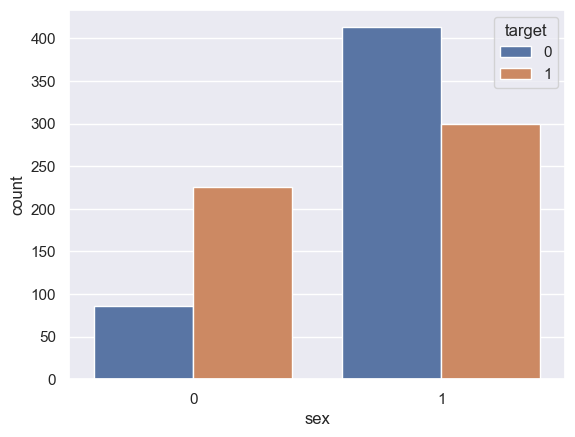

In [243]:
sns.countplot(data=df, x="sex", hue="target")

<Axes: xlabel='thal', ylabel='count'>

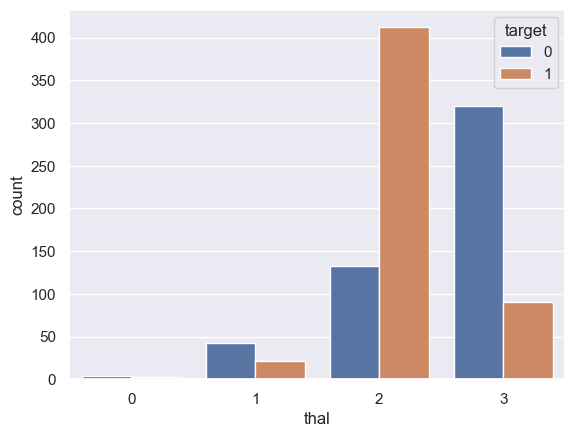

In [244]:
 sns.countplot(data=df, x="thal", hue="target")

<Axes: xlabel='age', ylabel='Count'>

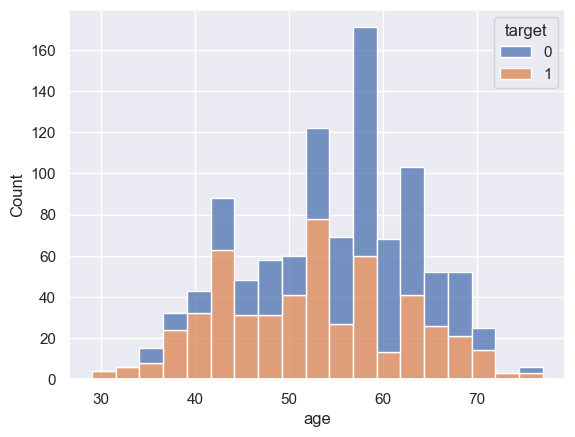

In [245]:
sns.histplot(data=df, x="age", hue="target", multiple="stack")

<Axes: xlabel='chol', ylabel='Count'>

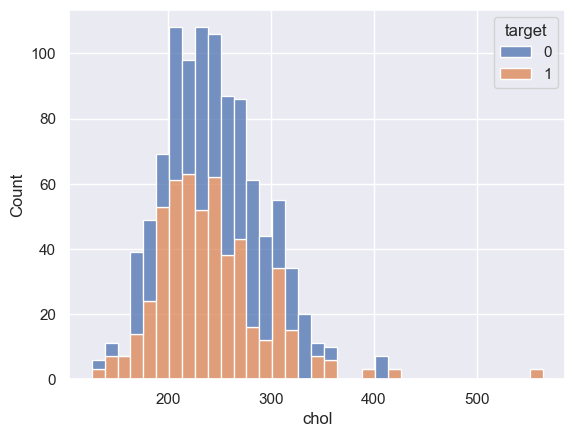

In [246]:
sns.histplot(data=df, x="chol", hue="target", multiple="stack")

<Axes: xlabel='trestbps', ylabel='Count'>

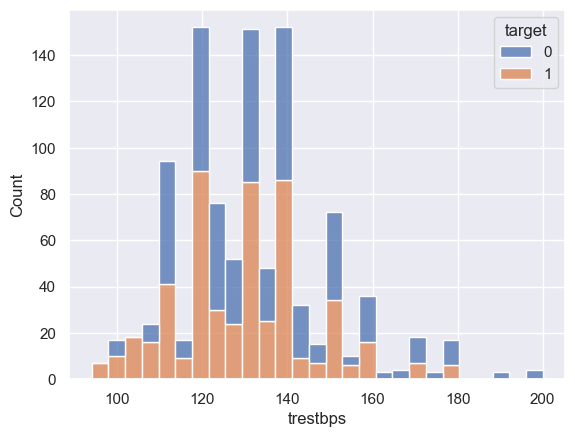

In [247]:
sns.histplot(data=df, x="trestbps", hue="target", multiple="stack")

<Axes: xlabel='thalach', ylabel='Count'>

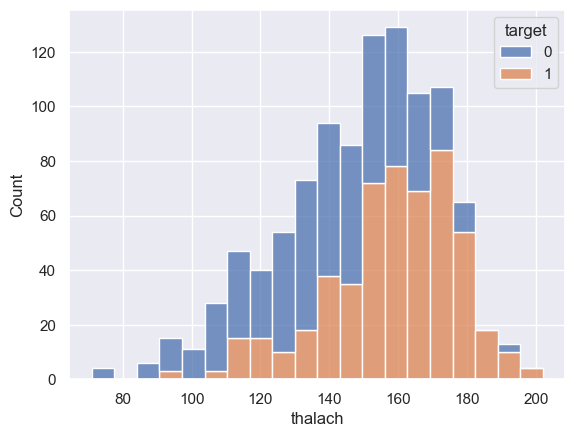

In [248]:
sns.histplot(data=df, x="thalach", hue="target", multiple="stack")

In [249]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

target
1    526
0    499
Name: count, dtype: int64


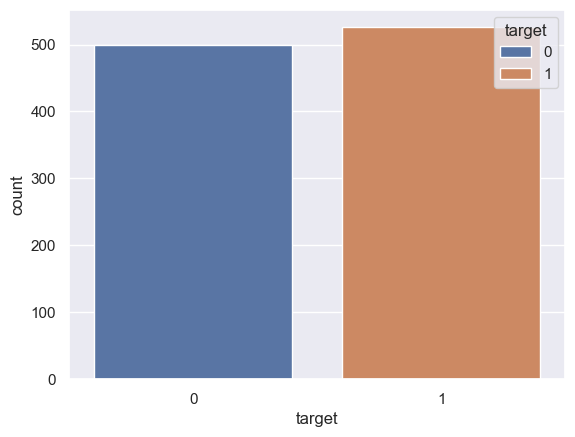

In [250]:
sns.countplot(data = df,x='target',hue="target")
print(df.target.value_counts())

In [251]:
from sklearn.utils import resample
df_maj=df[(df['target']==1)]
df_min=df[(df['target']==0)]
df_min_up=resample(df_min,
                   n_samples=526,
                   random_state=0)

In [252]:
df2=pd.concat([df_min_up,df_maj])

target
0    526
1    526
Name: count, dtype: int64


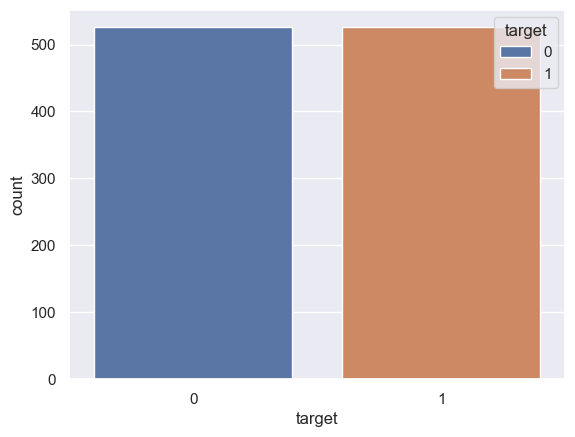

In [253]:
sns.countplot(data = df2,x='target',hue="target")
print(df2.target.value_counts())

<Axes: xlabel='age'>

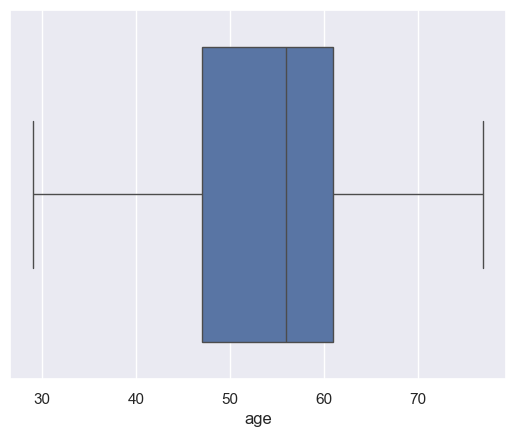

In [254]:
sns.boxplot(x=df2["age"])

<Axes: xlabel='trestbps'>

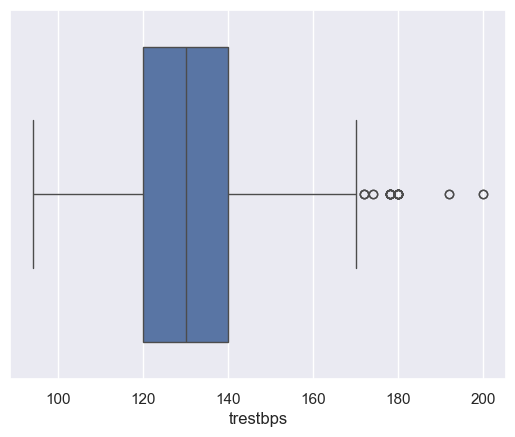

In [255]:
sns.boxplot(x=df2["trestbps"])

<Axes: xlabel='chol'>

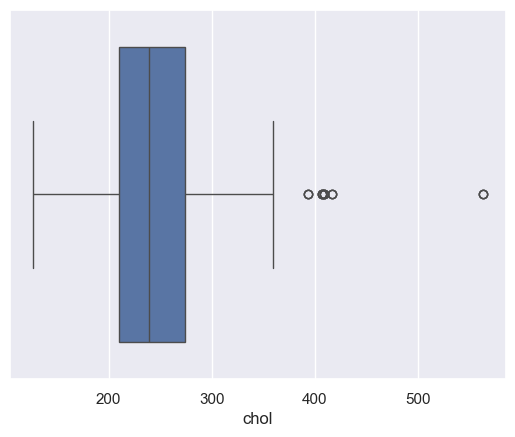

In [256]:
sns.boxplot(x=df2["chol"])

<Axes: xlabel='thalach'>

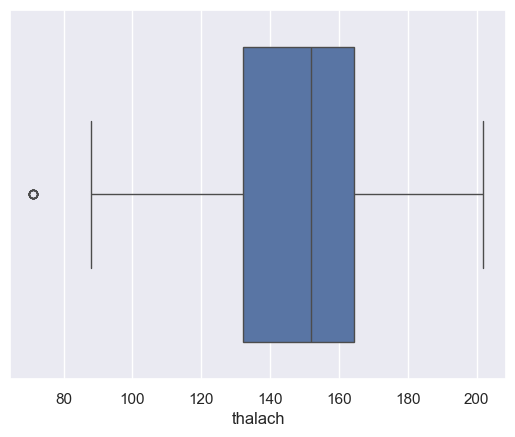

In [257]:
sns.boxplot(x=df2["thalach"])

<Axes: xlabel='oldpeak'>

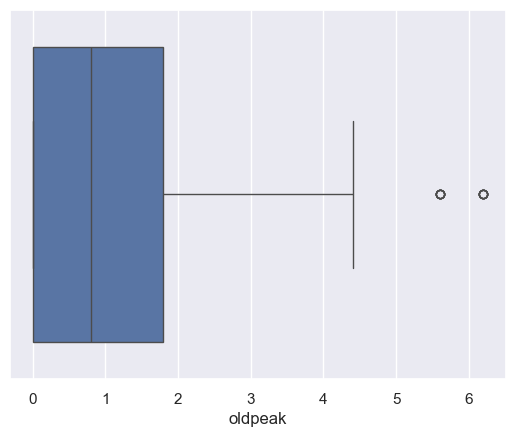

In [258]:
sns.boxplot(x=df2["oldpeak"])

In [259]:
import scipy.stats as stats
z = np.abs(stats.zscore(df2))
data_clean = df2[(z<3).all(axis = 1)] 
data_clean.shape

(989, 14)

<Axes: >

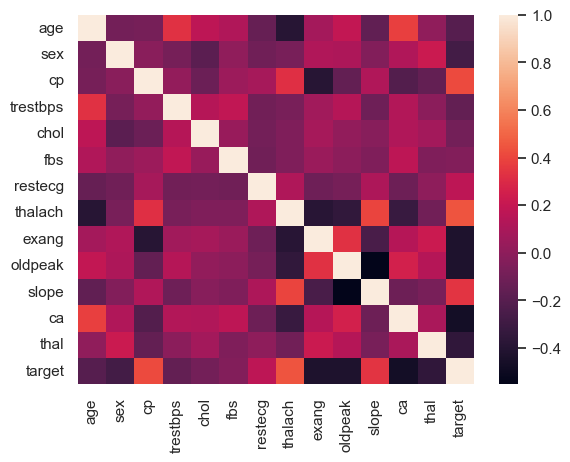

In [260]:
sns.heatmap(data_clean.corr(), fmt='.2g')

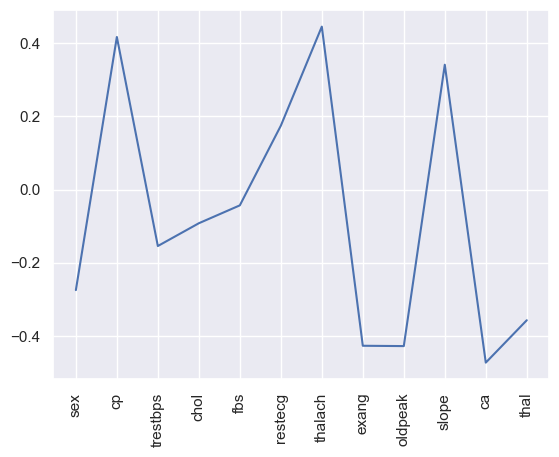

In [261]:
corr = data_clean[data_clean.columns[1:]].corr()['target'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

In [262]:
X = data_clean.drop('target', axis=1)
y = data_clean['target']

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [264]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [265]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 97.47 %


In [266]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9765258215962441
Precision Score :  0.9811320754716981
Recall Score :  0.9719626168224299


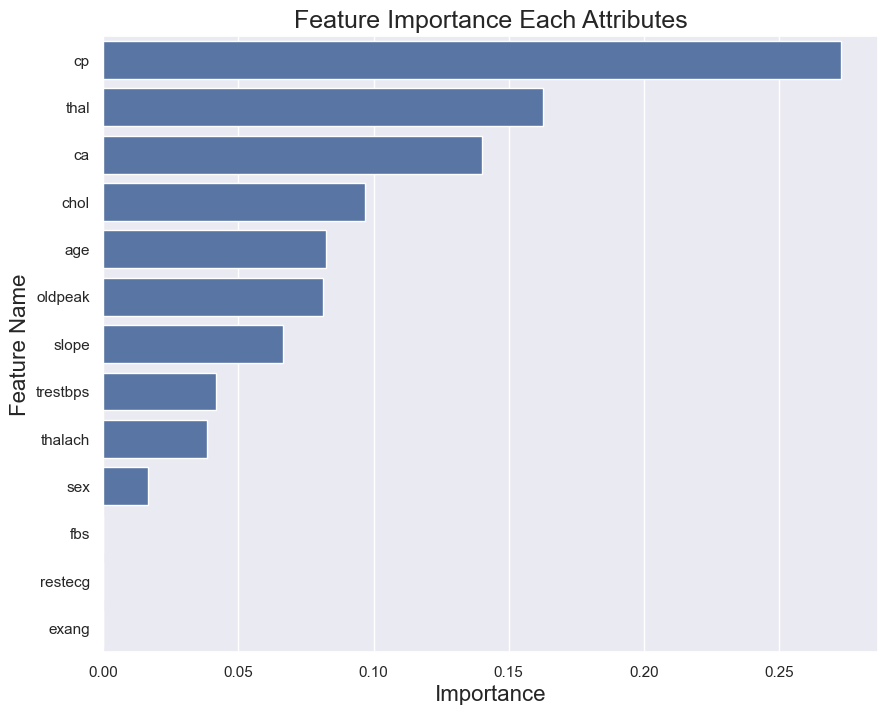

In [267]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [268]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [269]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 97.47 %


In [270]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9765258215962441
Precision Score :  0.9811320754716981
Recall Score :  0.9719626168224299


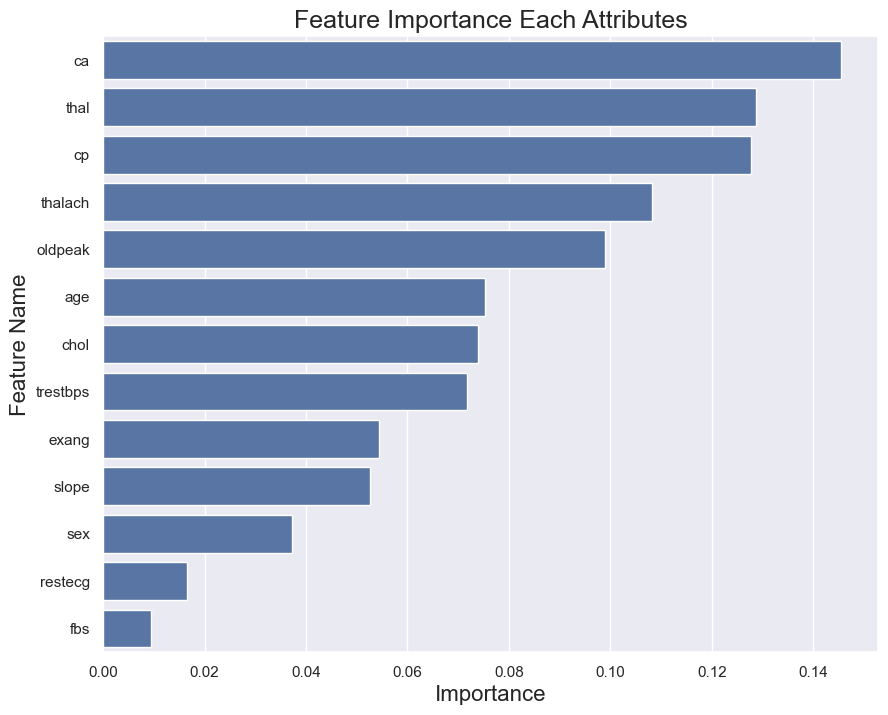

In [271]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [272]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)

C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=0)

In [273]:
y_pred = ada.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 87.37 %


In [274]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.8888888888888888
Precision Score :  0.847457627118644
Recall Score :  0.9345794392523364


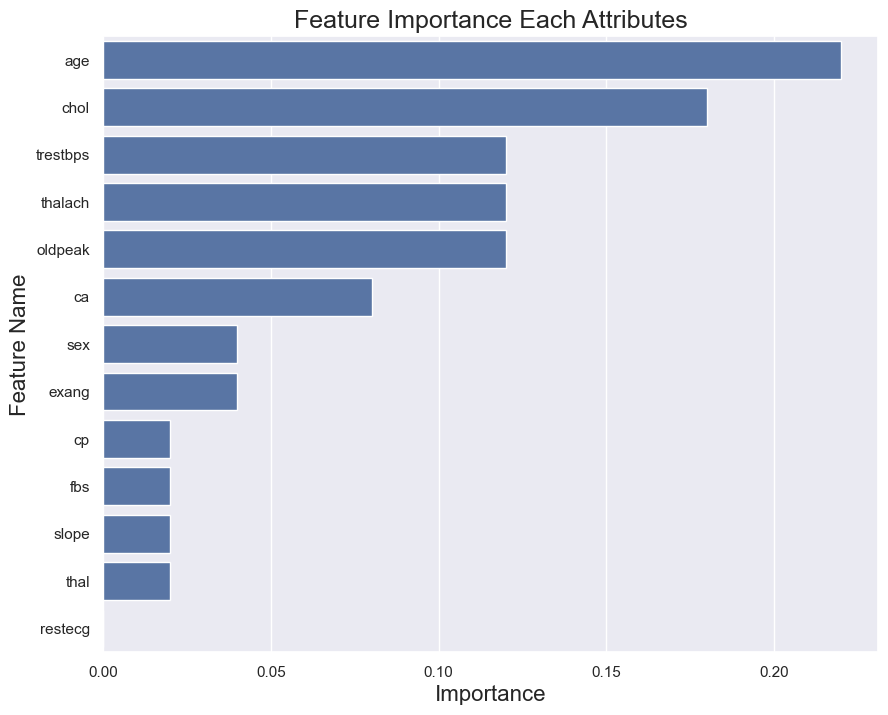

In [275]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()